# Building Value-driven Dashboards in Python

In this notebook, we will go through the process of creating a dashboard written in Python, for exploring the City of Melbourne's [Pedestrian Traffic Hourly Counts Dataset](https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-2009-to-Present-counts-/b2ak-trbp).

We will primarily be using the following Python libraries/tools:
* [JupyterLab](https://jupyterlab.readthedocs.io/): An interactive development environment that is well suited for exploratory data analysis. 
* [Dash](https://plotly.com/dash/): a framework for building analytic web-apps in Python.
* [Pandas](https://pandas.pydata.org): a library for analysing and processing tabular data.

See the instructions in the README at the base of this repository on how to setup the environment you'll need for working through this notebook.

_Note:_ You should also be able to use the original Jupyter Notebook (as opposed to JupyterLab) to complete this workshop, however I would recommend using JupyterLab, as this is what I used while developing the dashboard, and more generally because it offers a superior experience.

## Goals and Motivation

The goals of this notebook are as follows:

* Understand the types of options available when constructing dashboards and the kinds of contexts when choosing Python might be a good choice.
* Become familiar with the steps involved in the end-to-end process of producing a Python-based dashboard
* Help you become familiar with components of a tech stack that is well suited for this task.
* Answer some questions about pedestrian traffic patterns in Melbourne's CBD. 

_Note:_ There is not one single best-practice methodology for developing dashboards in Python. This is my attempt to distil some useful strategies and processes from what I've learnt from my experiences. 

## The Dataset
The dataset we'll be using is the Melbourne City Council's Pedestrian Counting System dataset, which is part of the council's [Open Data Portal](https://data.melbourne.vic.gov.au):

_This dataset contains hourly pedestrian counts since 2009 from pedestrian sensor devices located across the city. The data is updated on a monthly basis and can be used to determine variations in pedestrian activity throughout the day._

The data that we will be using comes from two separate datasets:

1. [The Pedestrian Counting System dataset](https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-2009-to-Present-counts-/b2ak-trbp), which contains the hourly traffic data.
2. [Pedestrian Sensor Locations](https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-Sensor-Locations/h57g-5234) dataset, which contains data about the sensors collecting the above data. 

In [9]:
from pathlib import Path
import pandas as pd

# change this if needed
data_path = Path("..") / "data"

sensor_csv_path = data_path / "Pedestrian_Counting_System_-_Sensor_Locations.csv"
counts_csv_path = data_path / "Pedestrian_Counting_System___2009_to_Present__counts_per_hour_.csv"

sensors_df = pd.read_csv(sensor_csv_path)
counts_df = pd.read_csv(counts_csv_path)

The sensor dataset contains a range of information regarding each sensor. We'll just be using the geographical cordinates of each sensor.

In [12]:
sensors_df.head()

,sensor_id,sensor_description,sensor_name,installation_date,status,note,direction_1,direction_2,latitude,longitude,location
0,59,Building 80 RMIT,RMIT_T,2019/02/13,A,NaN,North,South,-37.808256,144.963049,"(-37.80825648, 144.96304859)"
1,23,Spencer St-Collins St (South),Col623_T,2013/09/02,A,NaN,East,West,-37.819093,144.954527,"(-37.81909256, 144.95452749)"
2,20,Chinatown-Lt Bourke St (South),LtB170_T,2013/09/06,A,NaN,East,West,-37.811729,144.968247,"(-37.81172913, 144.9682466)"
3,34,Flinders St-Spark La,Fli32_T,2014/06/08,A,NaN,East,West,-37.815380,144.974150,"(-37.81537985, 144.9741505)"
4,57,Bourke St Bridge,BouBri_T,2018/08/13,A,NaN,West,East,-37.817673,144.950256,"(-37.8176735, 144.95025595)"


In [13]:
counts_df.head()

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
0,2887628,11/01/2019 05:00:00 PM,2019,November,1,Friday,17,34,Flinders St-Spark La,300
1,2887629,11/01/2019 05:00:00 PM,2019,November,1,Friday,17,39,Alfred Place,604
2,2887630,11/01/2019 05:00:00 PM,2019,November,1,Friday,17,37,Lygon St (East),216
3,2887631,11/01/2019 05:00:00 PM,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
4,2887632,11/01/2019 05:00:00 PM,2019,November,1,Friday,17,36,Queen St (West),774


## Your Mission

You will assume the role of a data specialist whose has been tasked with the responsibility of developing a dashboard for a non-profit research organisation. The organisation is about to embark on a project that will involve a historical analysis of social patterns in the Melbourne. Their team of researchers need a tool that will help them explore and understand pedestrian traffic flow around the CBD.

Through the rest of the notebook, you will go on the journey of dashboard creation, from discovery all the way through to deploying the dashboard for analysts to use.


## Discovery

In order to scope out the requirements of this projects, you spent a week talking and having workshops with various stakeholders, including the team of analysts who will use the dashboard and the the team that manages the technical infrastructure. Your findings are as follows:

* The team of analysts that will use dashboard currently use a combination of Python, SQL, and Excel for data wrangling and analysis. 
* For reporting and visualisation they use Tablau but have found this to be limiting.
* For a different dataset, they had previously engaged a delivery team to build a polished React dashboard using D3.js, but were then unable to extend the app when needed enhancements were identified.
* Ideally, they want a solution that they can maintain and extend themselves
* The team is prepared to undergo any training that would be required
* The infrastructure team has recently started using AWS and will be able to provide access to an account. 

You also identify the following information needs that the dashboard should support:
* How does the pedestrian traffic differ across locations and at different times?
* What is peak and off-peak period time for different months and season?
* What is the effect of specific events (eg Australian Open, Moomba, White Night, etc) on pedestrian movement?

## Solution Design

Based on the information gathered during discovery, you propose the following solution:

* The dashboard will be implemented using Dash, with visualisations being produced by the Plotly library.
* The app will be hosted on the org's AWS account.
* You will develop an initial version of the dashboard that features a set of customised and visualisations
* You will provide training to the analytics team on how to modify and extend the dashboard


## Phase 1: Exploratory Data Analysis

The first thing you do is get to understand the data. Not just at a high level, but really dive in and understant it. This is important for:
* identifying data quality or integrity issues
* understanding what kind of applications the data does and does not support

Broadly speaking, this process of exploratory data analysis (EDA) involves two main facets: 
1. Extractiong summary stastistics about data
2. Visualise your data

### Navigating Jupyer

Your Jupyter Notebook is a list of cells that are of two main types:
1. Mardown content (like this cell)
2. Code content (cells with Python in this notebook)

When using the notebook, you are in one of two modes, that function as what you'd imagine from their names:
1. Navigation mode
2. Edit mode

You can use your mouse to navitgate cells (double click activates edit mode) and perform cell operations using the Jupyter menu bar, but the less you need to use the mouse, the more fun you'll have :)

#### Convenient keyboard shortcuts you should familiarise yourself with:

__Navigation mode__
* `up`, `down`: navigate between cells
* `enter`: activate edit mode for the current cell
* `a`: create a new code cell above the current one
* `b`: create a new code cell below the current one
* `m`: change the current cell to be a markdown cell
* `y`: change the current cell to be a code cell
* `d` `d`: Delete the selected cell(s)
* `c`: copy the selected cell(s)
* `v`: paste the copied cell(s)
* `x`: cut the selected cell(s)
* `z`: undo cell operation

__Edit mode__
* `escape`: Switch to navigation mode 

__Edit mode & Navigation mode__
* `control`+`enter`: evaluate the current cell
* `shift`+`enter`: evaluate the current cell and move focus to cell below in navigation mode
* `alt`+`enter`: evaluate the current cell and create a new cell below in edit mode


### A Crash Course in Pandas

Pandas provides you with a powerful interface to help you manipulate and analyse data. It assists you perform the kind of tasks that you might already have used Excel or SQL to perform.

When working with data in Pandas, you typically work with a `DataFrame`, which is a data structure made of of columns and rows. Each column is a `Series`, which is a data structure that contains a sequence of values. If you've used Numpy before, a `Series` is essentially a Numpy array where each element has an index. This index means we can combine different data sources that share the same index, in exactly the same way as merging tables in SQL.

Let's look at the sensor counts `DataFrame` we have already read in above from the CSV.

In [20]:
type(counts_df)

pandas.core.frame.DataFrame

In [28]:
counts_df.tail(100)

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
3218358,3218359,06/30/2020 10:00:00 PM,2020,June,30,Tuesday,22,14,Sandridge Bridge,134
3218359,3218360,06/30/2020 10:00:00 PM,2020,June,30,Tuesday,22,26,QV Market-Elizabeth St (West),100
3218360,3218361,06/30/2020 10:00:00 PM,2020,June,30,Tuesday,22,24,Spencer St-Collins St (North),154
3218361,3218362,06/30/2020 10:00:00 PM,2020,June,30,Tuesday,22,23,Spencer St-Collins St (South),38
3218362,3218363,06/30/2020 10:00:00 PM,2020,June,30,Tuesday,22,25,Melbourne Convention Exhibition Centre,71
...,...,...,...,...,...,...,...,...,...,...
3218453,3218454,06/30/2020 11:00:00 PM,2020,June,30,Tuesday,23,62,La Trobe St (North),25
3218454,3218455,06/30/2020 11:00:00 PM,2020,June,30,Tuesday,23,63,231 Bourke St,69
3218455,3218456,06/30/2020 11:00:00 PM,2020,June,30,Tuesday,23,64,Royal Pde-Grattan St,7
3218456,3218457,06/30/2020 11:00:00 PM,2020,June,30,Tuesday,23,65,Swanston St - City Square,32


In [22]:
counts_df.columns

Index(['ID', 'Date_Time', 'Year', 'Month', 'Mdate', 'Day', 'Time', 'Sensor_ID',
       'Sensor_Name', 'Hourly_Counts'],
      dtype='object')

In [25]:
sensors = counts_df["Sensor_Name"]
sensors

0                  Flinders St-Spark La
1                          Alfred Place
2                       Lygon St (East)
3          Lonsdale St-Spring St (West)
4                       Queen St (West)
                       ...             
3218453             La Trobe St (North)
3218454                   231 Bourke St
3218455            Royal Pde-Grattan St
3218456       Swanston St - City Square
3218457               State Library-New
Name: Sensor_Name, Length: 3218458, dtype: object

In [26]:
type(sensors)

pandas.core.series.Series

### Cleaning Data

After inspecting the data, you see that only thing you need to do is make sure that Pandas reads in the `Date_Time` column as a data type suitable for handling date/time, as it isn't much use to us a string (which Pandas actually defaults to loading as an `object`).

This dataset is already pretty clean :)

In [29]:
counts_df.dtypes

ID                int64
Date_Time        object
Year              int64
Month            object
Mdate             int64
Day              object
Time              int64
Sensor_ID         int64
Sensor_Name      object
Hourly_Counts     int64
dtype: object

In [31]:
counts_df = pd.read_csv(counts_csv_path, parse_dates=["Date_Time"])

In [32]:
counts_df.dtypes

ID                        int64
Date_Time        datetime64[ns]
Year                      int64
Month                    object
Mdate                     int64
Day                      object
Time                      int64
Sensor_ID                 int64
Sensor_Name              object
Hourly_Counts             int64
dtype: object

### Exploring our Data

In [33]:
counts_df.shape

(3218458, 10)

In [37]:
# How many years does the data set cover?
years = counts_df["Year"].unique()
sorted(years)

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

In [40]:
# how many sensors do we have readings for
sensors = counts_df["Sensor_Name"].unique()
len(sensors)

69

#### What was the busiest/least busiest month in 2019?

Approach:
1. Filter data to 2019
2. Group counts by month, summing up each month
3. Get min and max

In [42]:
# 1. filtering
filter_mask = counts_df["Year"] == 2019
filter_mask

0           True
1           True
2           True
3           True
4           True
           ...  
3218453    False
3218454    False
3218455    False
3218456    False
3218457    False
Name: Year, Length: 3218458, dtype: bool

In [55]:
# 1. filtering
counts_2019_df = counts_df[filter_mask]
counts_2019_df.head()

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
0,2887628,2019-11-01 17:00:00,2019,November,1,Friday,17,34,Flinders St-Spark La,300
1,2887629,2019-11-01 17:00:00,2019,November,1,Friday,17,39,Alfred Place,604
2,2887630,2019-11-01 17:00:00,2019,November,1,Friday,17,37,Lygon St (East),216
3,2887631,2019-11-01 17:00:00,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
4,2887632,2019-11-01 17:00:00,2019,November,1,Friday,17,36,Queen St (West),774


In [117]:
# grouping
months_2019 = counts_df.groupby("Month")["Hourly_Counts"].sum()
months_2019

Month
April        151564562
August       153766468
December     170223773
February     156843588
January      157435313
July         155313182
June         149554005
March        172436211
May          156137355
November     160487798
October      161901572
September    153304281
Name: Hourly_Counts, dtype: int64

In [126]:
# useful way to get summary statistics about a data series
months_2019.describe()

count    1.200000e+01
mean     1.582473e+08
std      7.029606e+06
min      1.495540e+08
25%      1.536509e+08
50%      1.564905e+08
75%      1.608412e+08
max      1.724362e+08
Name: Hourly_Counts, dtype: float64

In [127]:
# idxmax and idxmin are like max and min but return indexes
print(f"Busiest month is: {months_2019.idxmax()}")
print(f"Least busy month is: {months_2019.idxmin()}")

Busiest month is: March
Least busy month is: June


### Visual Exploration with Plotly

In order to really understand our data, we have to look deeper than just summary statistics. Visualisation is an important tool for helping us build up a picture of what's happening in our data (both figurative and literally) and understanding what kind of insights it will be capable of generating. t's also important for identifying potential issues in your data 

We're now going to use Plotly to visualise the monthly traffic for 2019 using a bar chart.

There are a number of ways to build Plotly plots (or _figures_ in the Plotly world). We're going to be using Plotly Express, a high-level API that allows you to generate figures from Pandas DataFrames and Series quickly.    

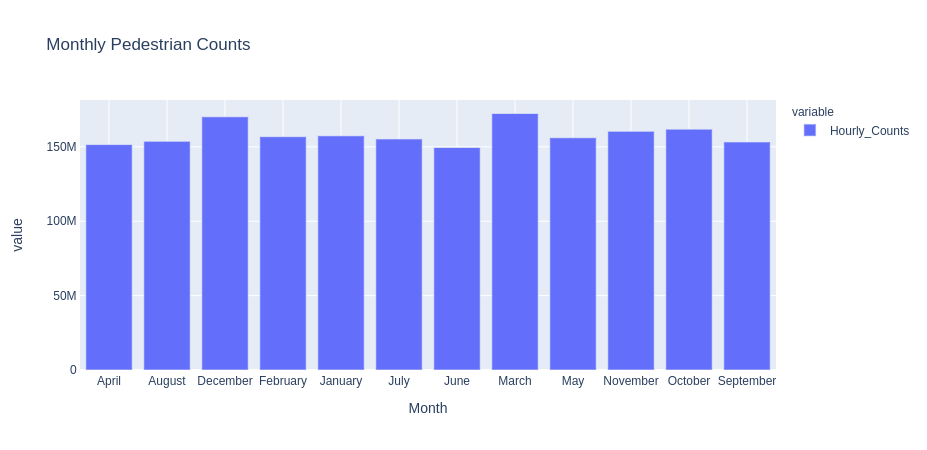

In [120]:
import plotly.express as px

# plotting from Series
px.bar(months_2019, title="Monthly Pedestrian Counts")

Hmmm alphebetically sorted months.... We'll fix that shortly.

Before we happened to have a Series we wanted to visualise, but often you will have a DataFrame. To illustrate how to use Plotly Express to visualise a DataFrame, let's first convert the Series into a DataFrame and then plot it.

In [122]:
months_2019_df = months_2019.reset_index()
months_2019_df

,Month,Hourly_Counts
0,April,151564562
1,August,153766468
2,December,170223773
3,February,156843588
4,January,157435313
5,July,155313182
6,June,149554005
7,March,172436211
8,May,156137355
9,November,160487798


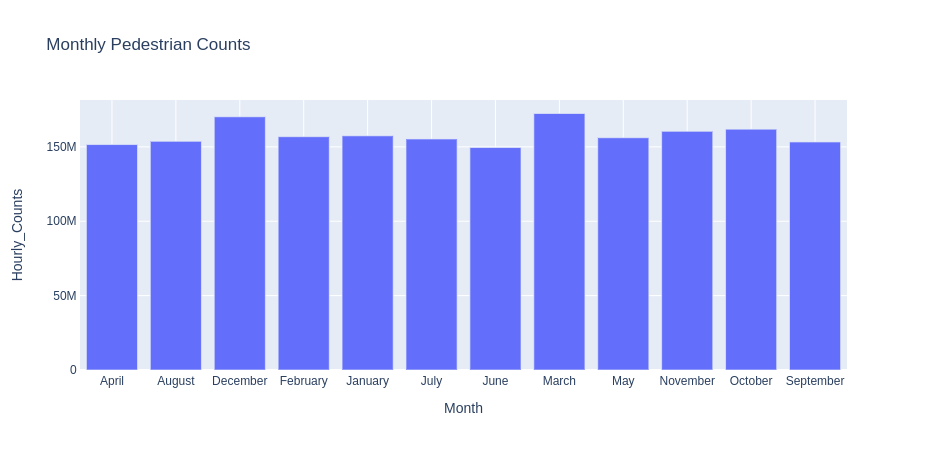

In [124]:
# plotting from DataFrame
px.bar(
    months_2019_df,
    x="Month",
    y="Hourly_Counts",
    title="Monthly Pedestrian Counts",
)

Now let's get our calendar sorted.

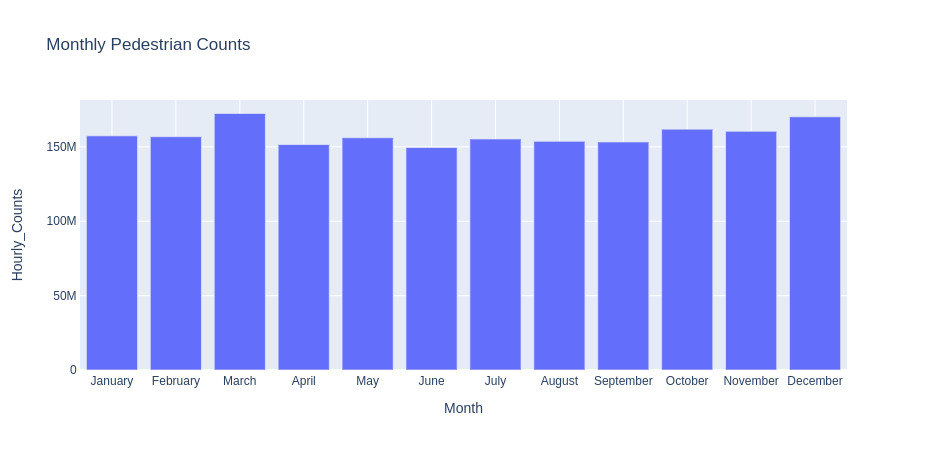

In [95]:
# use some pandas-fu because `sort_values` doesn't have a `key` param (to be added in v1.1!)
# this creates a new column with corresponding calendar month numbers that we can sort on
months_2019_df["month_num"] = pd.to_datetime(
    months_2019_df["Month"], format="%B"
).dt.month

px.bar(
    months_2019_df.sort_values(by="month_num"),
    x="Month",
    y="Hourly_Counts",
    title="Monthly Pedestrian Counts",
)

#### __*Hot Tip:*__ Always title your plots

```
This is particularly true when using visualisation for communnication, but it's also true when doing ad-hoc visualisations produces as you do EDA. Similarly to code comments, you may know what the plot shows when you make it, but the next person to look at your notebook (whether a colleague or you in a week or a month later) won't immediately know. Don't force them to have to decipher your Pandas wrangling to understand the plot! 
```

#### How has the number of pedestrian counts through the CBD changed over time?

Below we save the `Figure` object returned by Plotly Express and perform some layout updates before rendering it.

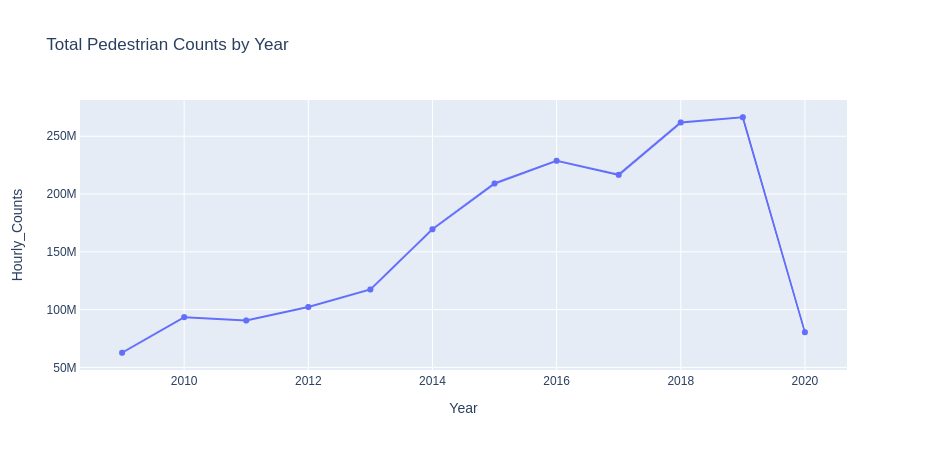

In [98]:
# count the total number of pedestrian counts for each year
year_counts_df = counts_df.groupby("Year")["Hourly_Counts"].sum().reset_index()

figure = px.line(year_counts_df, x="Year", y="Hourly_Counts", title="Total Pedestrian Counts by Year")
figure.update_traces(mode='lines+markers')
figure

What should we make of this plot?

Does it tell us that the CBD has seen steadily rising traffic each year? 

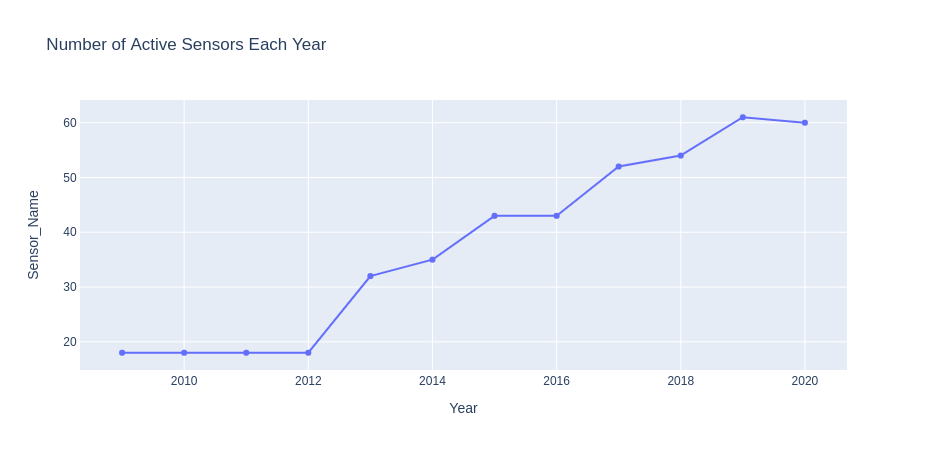

In [91]:
# count the number of distinct sensors each year 
sensor_numbers_df = counts_df.groupby("Year")["Sensor_Name"].nunique().reset_index()

figure = px.line(sensor_counts_df, x="Year", y="Sensor_Name", title="Number of Active Sensors Each Year")
figure.update_traces(mode='lines+markers')
figure

This suggests that we need to be careful about comparing aggregate counts over time, as not only might the underlying phenomena be changing (the pedestrians moving around the CBS), the method used to capture this data is also changing.

We should also be careful about how we interpret aggregate counts since some moving around the city will be counted multipe times if they happen to pass through multiple sensors, while others may not.

#### __*Hot Tip:*__ Move code into functions 

As you do your data wrangling and analysing, repeated groups of patterns of functinality will emerge. Where it makes sense, move such code into functions that capture these abstractions sooner rather than later. This comes with the following benefits:

1. Your code will be easier to read, with its intent being much clearer.
2. These functions become reusable tools that will accelerate further analysis.
3. The process of migrating code into the dashboard codebase will be *dramatically* easier.
4. You will protect your global namespace from being polluted with intermediate variables used inside the functions. Over time these build up and inevitably lead to bugs and/or confusion. 

In [129]:
# look at what we've already collected in our global scope!
[var for var in dir() if not var.startswith("_")]

['In',
 'Out',
 'Path',
 'calendar',
 'counts_2019_df',
 'counts_csv_path',
 'counts_df',
 'data_path',
 'exit',
 'figure',
 'filter_mask',
 'get_ipython',
 'months_2019',
 'months_2019_df',
 'os',
 'pd',
 'px',
 'quit',
 'sensor_counts_df',
 'sensor_csv_path',
 'sensor_numbers_df',
 'sensors',
 'sensors_df',
 'sort_months',
 'year_counts_df',
 'years']

### Getting our function on

Let's create a function `plot_months_bar` that will make a plot of sensor counts for a desired year.

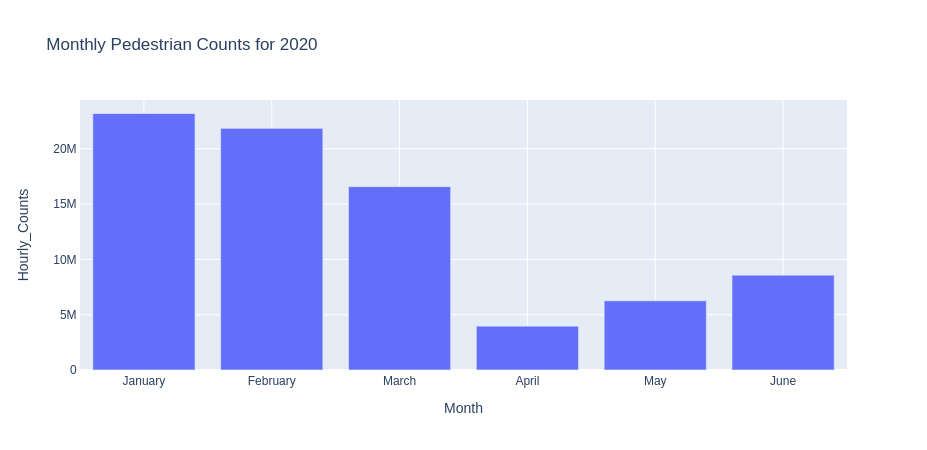

In [138]:
def plot_months(counts_df, year):
    """Make a bar chart of monthly counts for a given year"""
    year_df = counts_df[counts_df["Year"] == year]
    months_df = year_df.groupby("Month")["Hourly_Counts"].sum().reset_index()
    months_df["month_num"] = pd.to_datetime(months_df["Month"], format="%B").dt.month
    months_df = months_df.sort_values(by="month_num")
    return px.bar(
        months_df, x="Month", y="Hourly_Counts", title=f"Monthly Pedestrian Counts for {year}",
    )


plot_months(counts_df, 2020)

There's more we could do as part of the EDA for this dataset, but we're going to move on to the next stage. This process is never really "complete", as there's always more ways you could dive into the dataset further. However without working towards a specific goal this would yield decreasing value as we went on. 

Importantly for us right now:
* we have not identified any data integrity issues.
* We are confident that the data will support what we want to use it for.


## Phase 2: Visualisation Development

Our analysis work now shifts towards producing plots that are designed to meet the identified needs of the researchers and that are suitable of being used within our dashboard.

For the initial version of the dashboard, you decide to target visualisations that aim to:

1. Visualise aggregate pedestrian traffic
3. Visualise pedestrian traffic temporally
2. Visualise pedestrian traffic spatially

### Smarter Filtering

Rather than baking the DataFrame filtering into the functions, you decide to make a general purpose filtering function that can filter your dataset on year, month, and sensor name. Each of these filter params can also be a sequence, in which the filter opration will restric records to those that match _any_ fot the values in the sequence. 

In [151]:
import numbers
import collections

def filter_df(df, year=None, month=None, sensor=None):
    """Filter a pedestrian counts DataFrame

    All params {year, month, sensor} take a value or sequence of values
    filtering the input DataFrame to only rows that matches those values. (A
    sequence filters to rows with fields matching *any* value in the sequence)
    """
    params = {"Year": year, "Sensor_Name": sensor, "Month": month}
    for param, param_val in params.items():
        if param_val is None:
            continue
        elif is_value(param_val):
            param_val = [param_val]
        elif isinstance(param_val, collections.abc.Iterable):
            param_val = list(param_val)
        else:
            raise Exception(
                f"Invalid value {param_val}, params must be str, numeric, or"
                " an iterable"
            )
        if len(param_val) == 0:
            continue
        df = df[df[param].isin(set(param_val))]
    return df


def is_value(obj):
    """Check if an object is a string or numeric value"""
    return isinstance(obj, str) or isinstance(obj, numbers.Number)

In [156]:
# get all records from 2020, for the following sen:
sensors = ["Lygon St (East)", "Lygon St (West)", "Faraday St-Lygon (West)"]
lygon_2020_df = filter_df(counts_df, year=2020, sensor=sensors)
lygon_2020_df 

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
2966865,2966866,2020-01-01 00:00:00,2020,January,1,Wednesday,0,31,Lygon St (West),224
2966869,2966870,2020-01-01 00:00:00,2020,January,1,Wednesday,0,37,Lygon St (East),109
2966921,2966922,2020-01-01 01:00:00,2020,January,1,Wednesday,1,31,Lygon St (West),105
2966925,2966926,2020-01-01 01:00:00,2020,January,1,Wednesday,1,37,Lygon St (East),143
2966977,2966978,2020-01-01 02:00:00,2020,January,1,Wednesday,2,31,Lygon St (West),63
...,...,...,...,...,...,...,...,...,...,...
3218313,3218314,2020-06-30 21:00:00,2020,June,30,Tuesday,21,37,Lygon St (East),53
3218368,3218369,2020-06-30 22:00:00,2020,June,30,Tuesday,22,31,Lygon St (West),115
3218371,3218372,2020-06-30 22:00:00,2020,June,30,Tuesday,22,37,Lygon St (East),42
3218426,3218427,2020-06-30 23:00:00,2020,June,30,Tuesday,23,31,Lygon St (West),61


### Visualising aggregate pedestrian traffic

To start with, we take our existing month bar chart, and polish it up a little, adding the ability to compare different sensors.

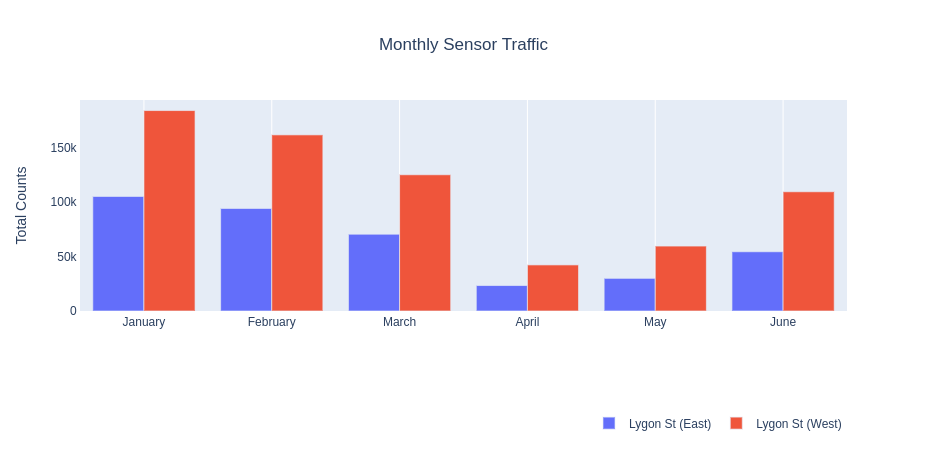

In [158]:
def plot_month_counts(
    df, split_sensors=False, title="Monthly Sensor Traffic", **kwargs
):
    """Make a bar plot of monthly counts"""
    if split_sensors:
        group_cols = ["Month", "Sensor_Name"]
        color = "Sensor_Name"
    else:
        group_cols = ["Month"]
        color = None
    month_df = df.groupby(group_cols)["Hourly_Counts"].sum().reset_index()
    month_df["month_num"] = pd.to_datetime(month_df.Month, format="%B").dt.month
    figure = px.bar(
        month_df.sort_values(by="month_num"),
        x="Month",
        y="Hourly_Counts",
        barmode="group",
        color=color,
        title=title,
        **kwargs,
    )
    figure.update_layout(
        title_x=0.5,
        yaxis_title="Total Counts",
        yaxis_showgrid=False,
        yaxis_zeroline=False,
        xaxis_title=None,
        legend=dict(
            title_text="",
            orientation="h",
            yanchor="bottom",
            y=-0.6,
            xanchor="right",
            x=1,
        ),
    )
    return figure


plot_month_counts(lygon_2020_df, split_sensors=True)

Another way we can visualise aggregate pedestrian traffic is accross sensors:

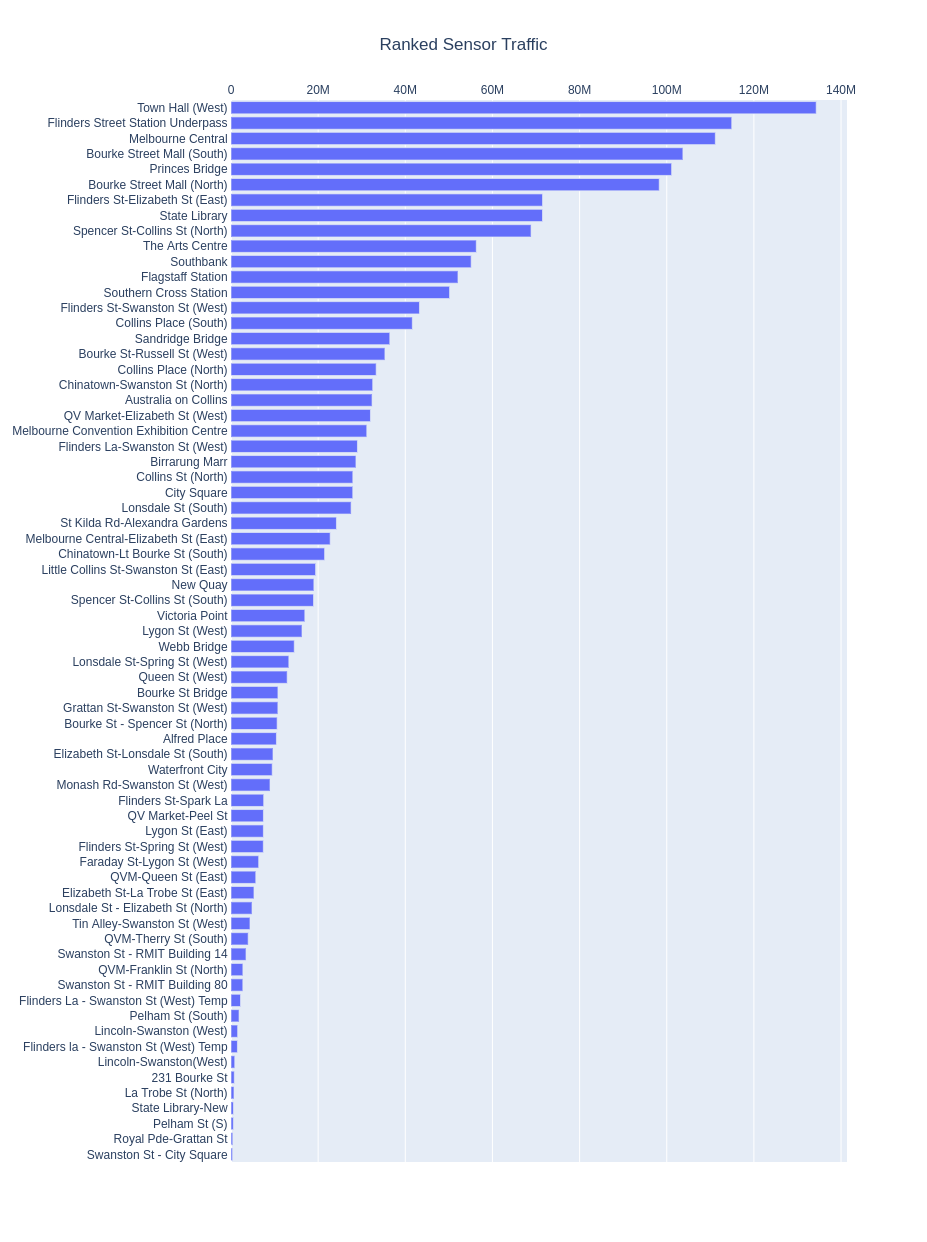

In [161]:
def plot_sensor_counts(df, title="Ranked Sensor Traffic", **kwargs):
    """Make a bar chart of total counts for each sensor"""
    total_df = (
        df.groupby("Sensor_Name")["Hourly_Counts"]
        .sum()
        .sort_values()
        .reset_index(name="Total Counts")
    )
    if "height" not in kwargs:
        kwargs["height"] = max(18 * len(total_df), 500)

    figure = px.bar(
        total_df,
        x="Total Counts",
        y="Sensor_Name",
        orientation="h",
        title=title,
        **kwargs,
    )
    figure.update_layout(
        title_x=0.5,
        yaxis_title=None,
        yaxis_showgrid=False,
        xaxis_title=None,
        xaxis_side="top",
    )
    return figure

plot_sensor_counts(counts_df)

### Visualising pedestrian traffic temporally

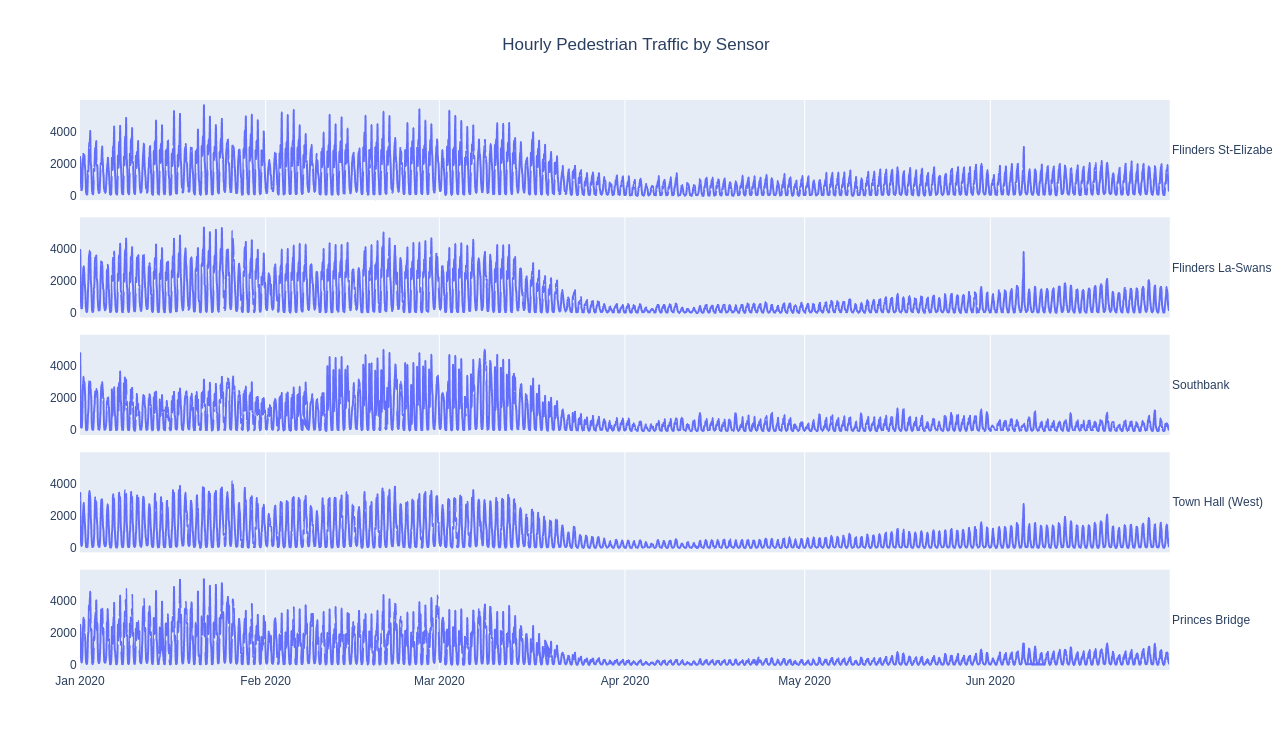

In [168]:
def plot_sensor_traffic(
    df,
    same_yscale=False,
    row_height=150,
    limit=5,
    title=f"Hourly Pedestrian Traffic by Sensor",
    **kwargs,
):
    """Plot hourly traffic for one or more sensors"""
    if len(df) == 0:
        return None
    target_sensors = (
        df.groupby("Sensor_Name")["Hourly_Counts"].sum().sort_values(ascending=False)
    )[:limit]

    df = df[df["Sensor_Name"].isin(set(target_sensors.index))]

    if "height" not in kwargs:
        kwargs["height"] = max(len(target_sensors) * row_height, 400)

    figure = px.line(
        df,
        y="Hourly_Counts",
        x="Date_Time",
        facet_row="Sensor_Name",
        title=title,
        category_orders={"Sensor_Name": list(target_sensors.index)},
        **kwargs,
    )
    figure.update_layout(title_x=0.5)
    figure.update_yaxes(
        matches=None if same_yscale else "y",
        showgrid=False,
        zeroline=False,
        title_text=None,
    )
    figure.update_xaxes(showgrid=True, title_text=None)
    figure.for_each_annotation(
        lambda a: a.update(textangle=0, text=a.text.split("=")[-1])
    )
    return figure


results_df = filter_df(counts_df, year=2020)
plot_sensor_traffic(results_df)

### Visualising pedestrian traffic spatially

In order to plot spatially, we're going to need the geographic coordinates of the sensors. Let's reload the dataset, this time joining it with the 

In [175]:
def load_and_clean_pedestrian_data(counts_csv_path, sensor_csv_path=None):
    df = pd.read_csv(counts_csv_path).set_index("ID")
    df["Date_Time"] = pd.to_datetime(
        {
            "day": df["Mdate"],
            "year": df["Year"],
            "hour": df["Time"],
            "month": pd.to_datetime(df["Month"], format="%B").dt.month,
        }
    )
    if sensor_csv_path is not None:
        geo_df = pd.read_csv(
            sensor_csv_path, usecols=["sensor_id", "latitude", "longitude"]
        )
        df = df.merge(geo_df, left_on="Sensor_ID", right_on="sensor_id")
    df = df.sort_values("Date_Time")
    return df


counts_df = load_and_clean_pedestrian_data(counts_csv_path, sensor_csv_path)
counts_df.head()

,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts,sensor_id,latitude,longitude
1449030,2009-05-01,2009,May,1,Friday,0,9,Southern Cross Station,5,9,-37.819830,144.951026
2202763,2009-05-01,2009,May,1,Friday,0,14,Sandridge Bridge,95,14,-37.820112,144.962919
1644371,2009-05-01,2009,May,1,Friday,0,12,New Quay,2,12,-37.814580,144.942924
1546921,2009-05-01,2009,May,1,Friday,0,10,Victoria Point,8,10,-37.818765,144.947105
851691,2009-05-01,2009,May,1,Friday,0,17,Collins Place (South),28,17,-37.813625,144.973236


Next we need to set our mapbox token:

In [170]:
# either set this environment with your mapbox key or directly assign your mapbox key here 
mapbox_key = os.getenv("MAPBOX_KEY")
px.set_mapbox_access_token(mapbox_key)

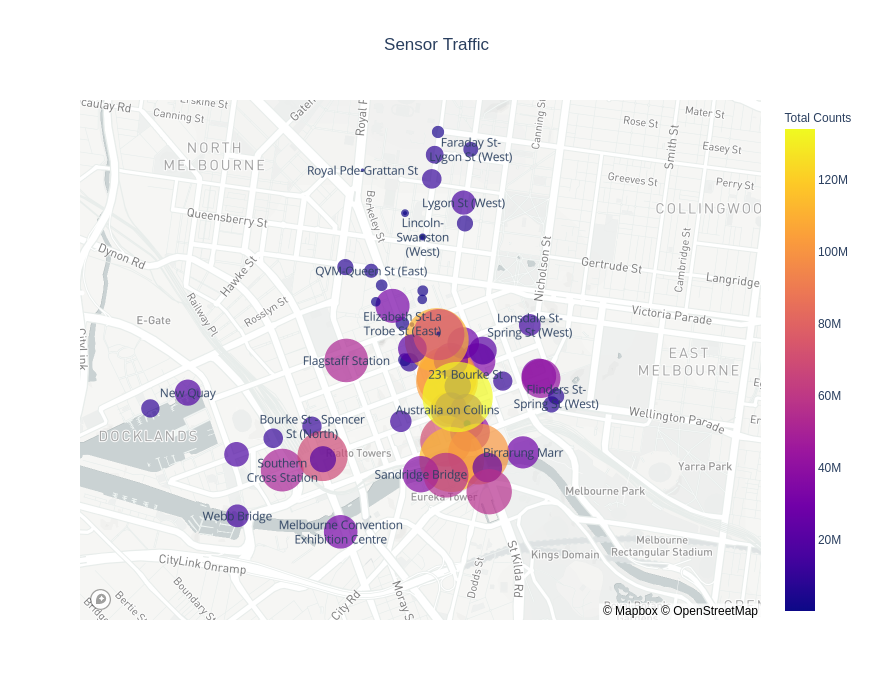

In [179]:
def plot_sensor_map(df, title = "Sensor Traffic", **kwargs):
    """Plot a spatial scatter plot of sensor traffic."""
    sensor_totals_df = (
        df.groupby("Sensor_Name")
        .agg(
            {
                "Hourly_Counts": sum,
                "latitude": lambda x: x.iloc[0],
                "longitude": lambda x: x.iloc[0],
            }
        )
        .reset_index().rename(columns={"Hourly_Counts": "Total Counts"})
    )
    figure = px.scatter_mapbox(
        sensor_totals_df,
        lat="latitude",
        lon="longitude",
        color="Total Counts",
        size="Total Counts",
        text="Sensor_Name",
        color_continuous_scale=px.colors.sequential.Plasma,
        size_max=50,
        zoom=13,
        title=title,
        **kwargs,
    )
    figure.update_layout(title_x=0.5)
    return figure


results_df = filter_df(counts_df, year=2019)
plot_sensor_map(counts_df, height=700)

## Phase 3: Escaping the Notebook

1. capturing repeated actions with abstractions
 * loading and saving data
 * filter data
 * make custom plots from filtered data
2. converting code into a package (a hot tip)

Why:
1. gives you tools for performing later analysis faster and will enable cleaner, more maintianable, and more extensable dashboard code.  

#### __*Hot Tip:*__ Convert your project into a package

```
TODO
```

## Phase 4: Making the Dashboard

### Dash

Dash tutorial link:



### Layout

### Callbacks

### Walkthough the Dashboard

## Phase 5: Deploying the Dashboard